In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

mpl.rcParams['figure.figsize'] = (30, 10)
mpl.rcParams['axes.grid'] = False

In [2]:
df= pd.read_pickle('dataset/raw/pms_occupancy.pkl')

In [3]:
df = df[df['HotelId'] == 48]

In [4]:
df['TargetDate'] = pd.to_datetime(df['TargetDate'],format="%Y-%m-%d")
df['SnapshotDateTime'] = pd.to_datetime(df['SnapshotDateTime'].dt.date,format="%Y-%m-%d")

In [5]:
df['DBA'] = (df['TargetDate']-df['SnapshotDateTime']).astype('timedelta64[D]')

In [6]:
df.head(10)

,HotelId,TargetDate,SnapshotDateTime,LeadTime,Definitive,Rooms,DBA
9535058,48,2020-09-15,2020-09-15,-0.291667,39,52,0.0
9535059,48,2020-09-15,2020-09-14,0.208333,39,52,1.0
9535060,48,2020-09-15,2020-09-13,1.208333,34,52,2.0
9535061,48,2020-09-15,2020-09-12,2.208333,31,52,3.0
9535062,48,2020-09-15,2020-09-11,3.208333,34,52,4.0
9535063,48,2020-09-15,2020-09-10,4.208333,18,52,5.0
9535064,48,2020-09-15,2020-09-09,5.208333,16,52,6.0
9535065,48,2020-09-15,2020-09-08,6.208333,15,52,7.0
9535066,48,2020-09-15,2020-09-07,7.208333,12,52,8.0
9535067,48,2020-09-15,2020-09-06,8.208333,12,52,9.0


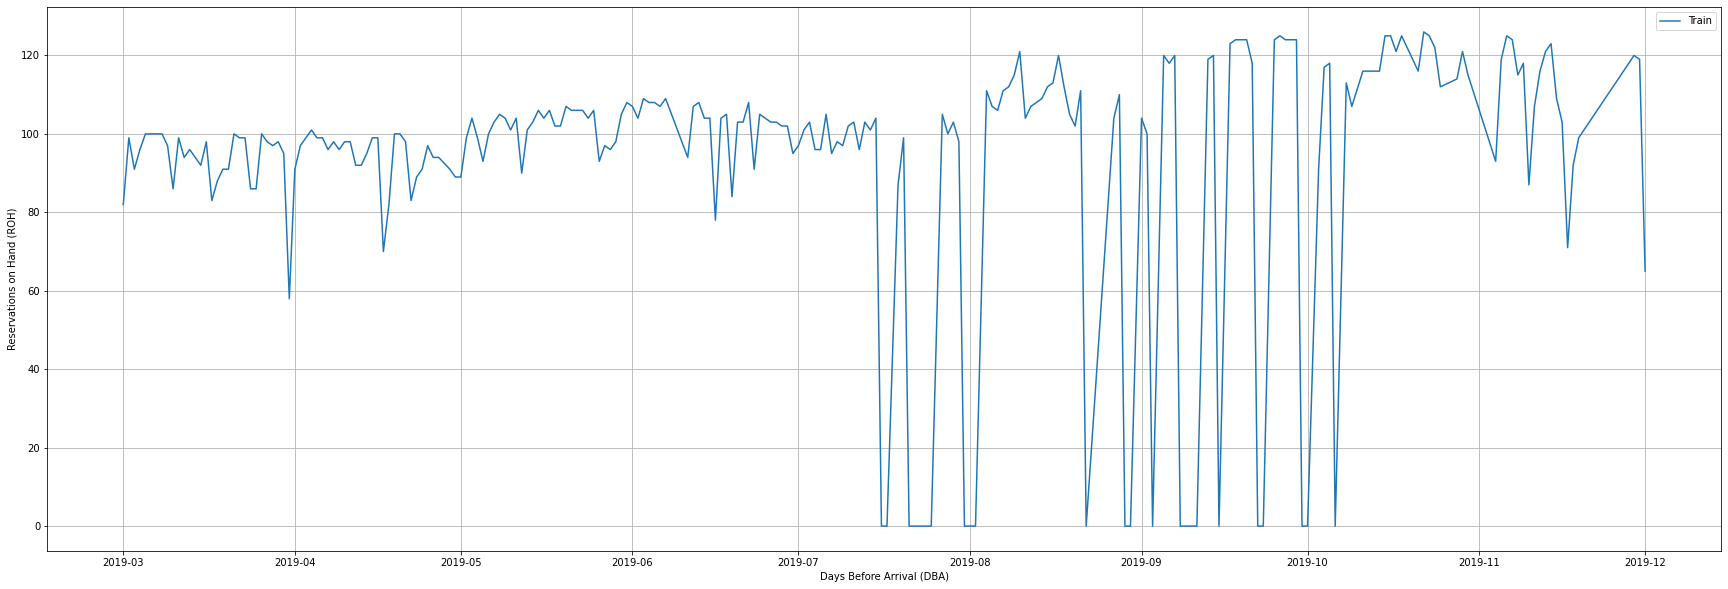

In [45]:
dx = df[(df['TargetDate']>='2019-03')&(df['TargetDate']<='2019-12')&(df['DBA']==0)]
plt.plot(dx.TargetDate, dx['Definitive'], label='Train')
plt.xlabel('Days Before Arrival (DBA)')
plt.ylabel('Reservations on Hand (ROH)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
df = df.drop(columns=['HotelId','SnapshotDateTime','LeadTime'])
df = df.rename(columns={'TargetDate':'DOA','Definitive':'ROH'})
df.head()

,DOA,ROH,Rooms,DBA
9535058,2020-09-15,39,52,0.0
9535059,2020-09-15,39,52,1.0
9535060,2020-09-15,34,52,2.0
9535061,2020-09-15,31,52,3.0
9535062,2020-09-15,34,52,4.0


In [21]:
df['ROH'] = df['ROH'].astype('float')
df['Rooms'] = df['Rooms'].astype('float')

df.dtypes

DOA      datetime64[ns]
ROH             float64
Rooms           float64
DBA             float64
dtype: object

In [22]:
df.shape

(339470, 4)

In [23]:
df.groupby('DBA').size()

DBA
-19.0       1
-18.0       1
-17.0       1
-16.0       1
-15.0       1
         ... 
 360.0    833
 361.0    832
 362.0    831
 363.0    830
 364.0    829
Length: 384, dtype: int64

In [24]:
df.corr(method='pearson')

,ROH,Rooms,DBA
ROH,1.000000,-0.097179,-0.492487
Rooms,-0.097179,1.000000,0.316666
DBA,-0.492487,0.316666,1.000000


<AxesSubplot:>

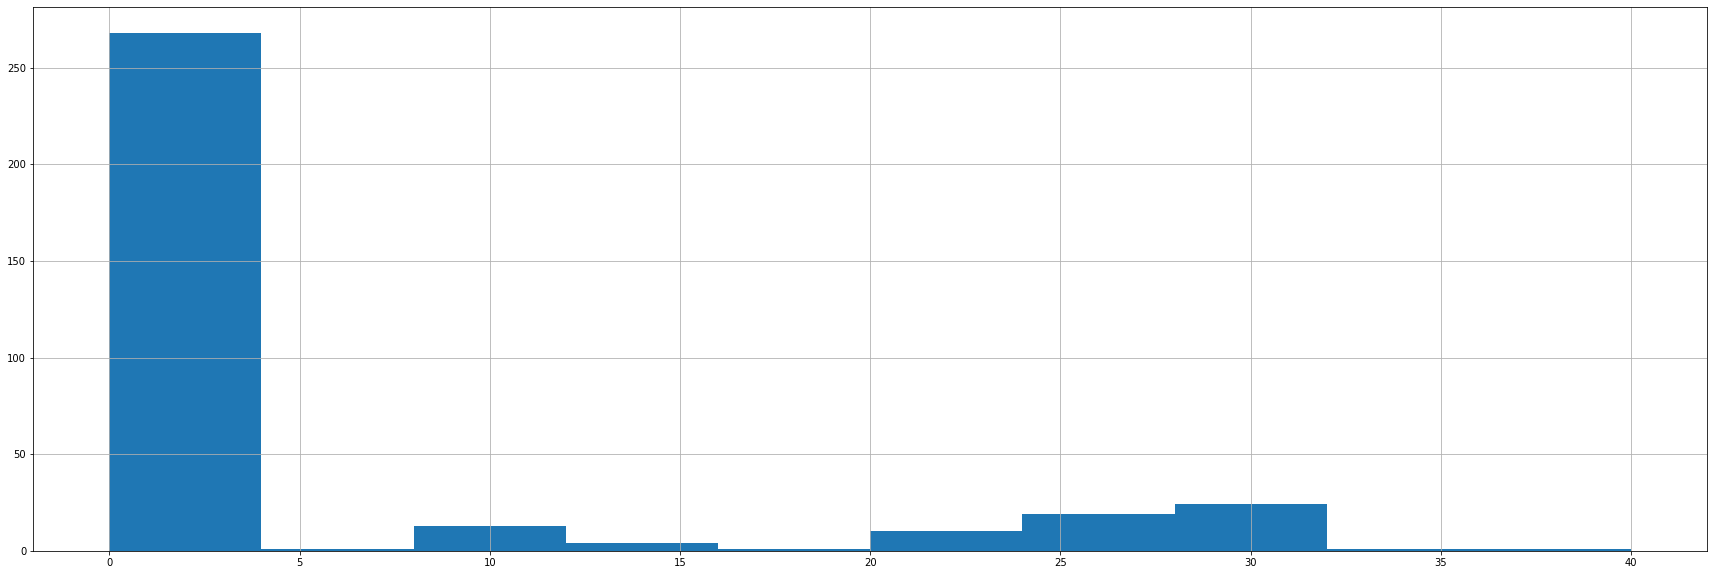

In [22]:
dx['Definitive'].hist()

In [1]:
df = pd.read_pickle('dataset/preprocessed/48_imputed.pkl')

In [18]:
dx = df[df['DBA'].isin([89,79,69,59,49,39,29,19,9,0])][:10][['DOA','DBA','Rooms','ROH']]

In [22]:
dx['DBA'] = 89-dx['DBA']

# Plot combined 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.rcParams['figure.figsize'] = (30, 30)
# mpl.rcParams['axes.grid'] = True

In [2]:
df = pd.read_csv('dataset/results.csv')
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])
df = df.set_index(['DBA'])

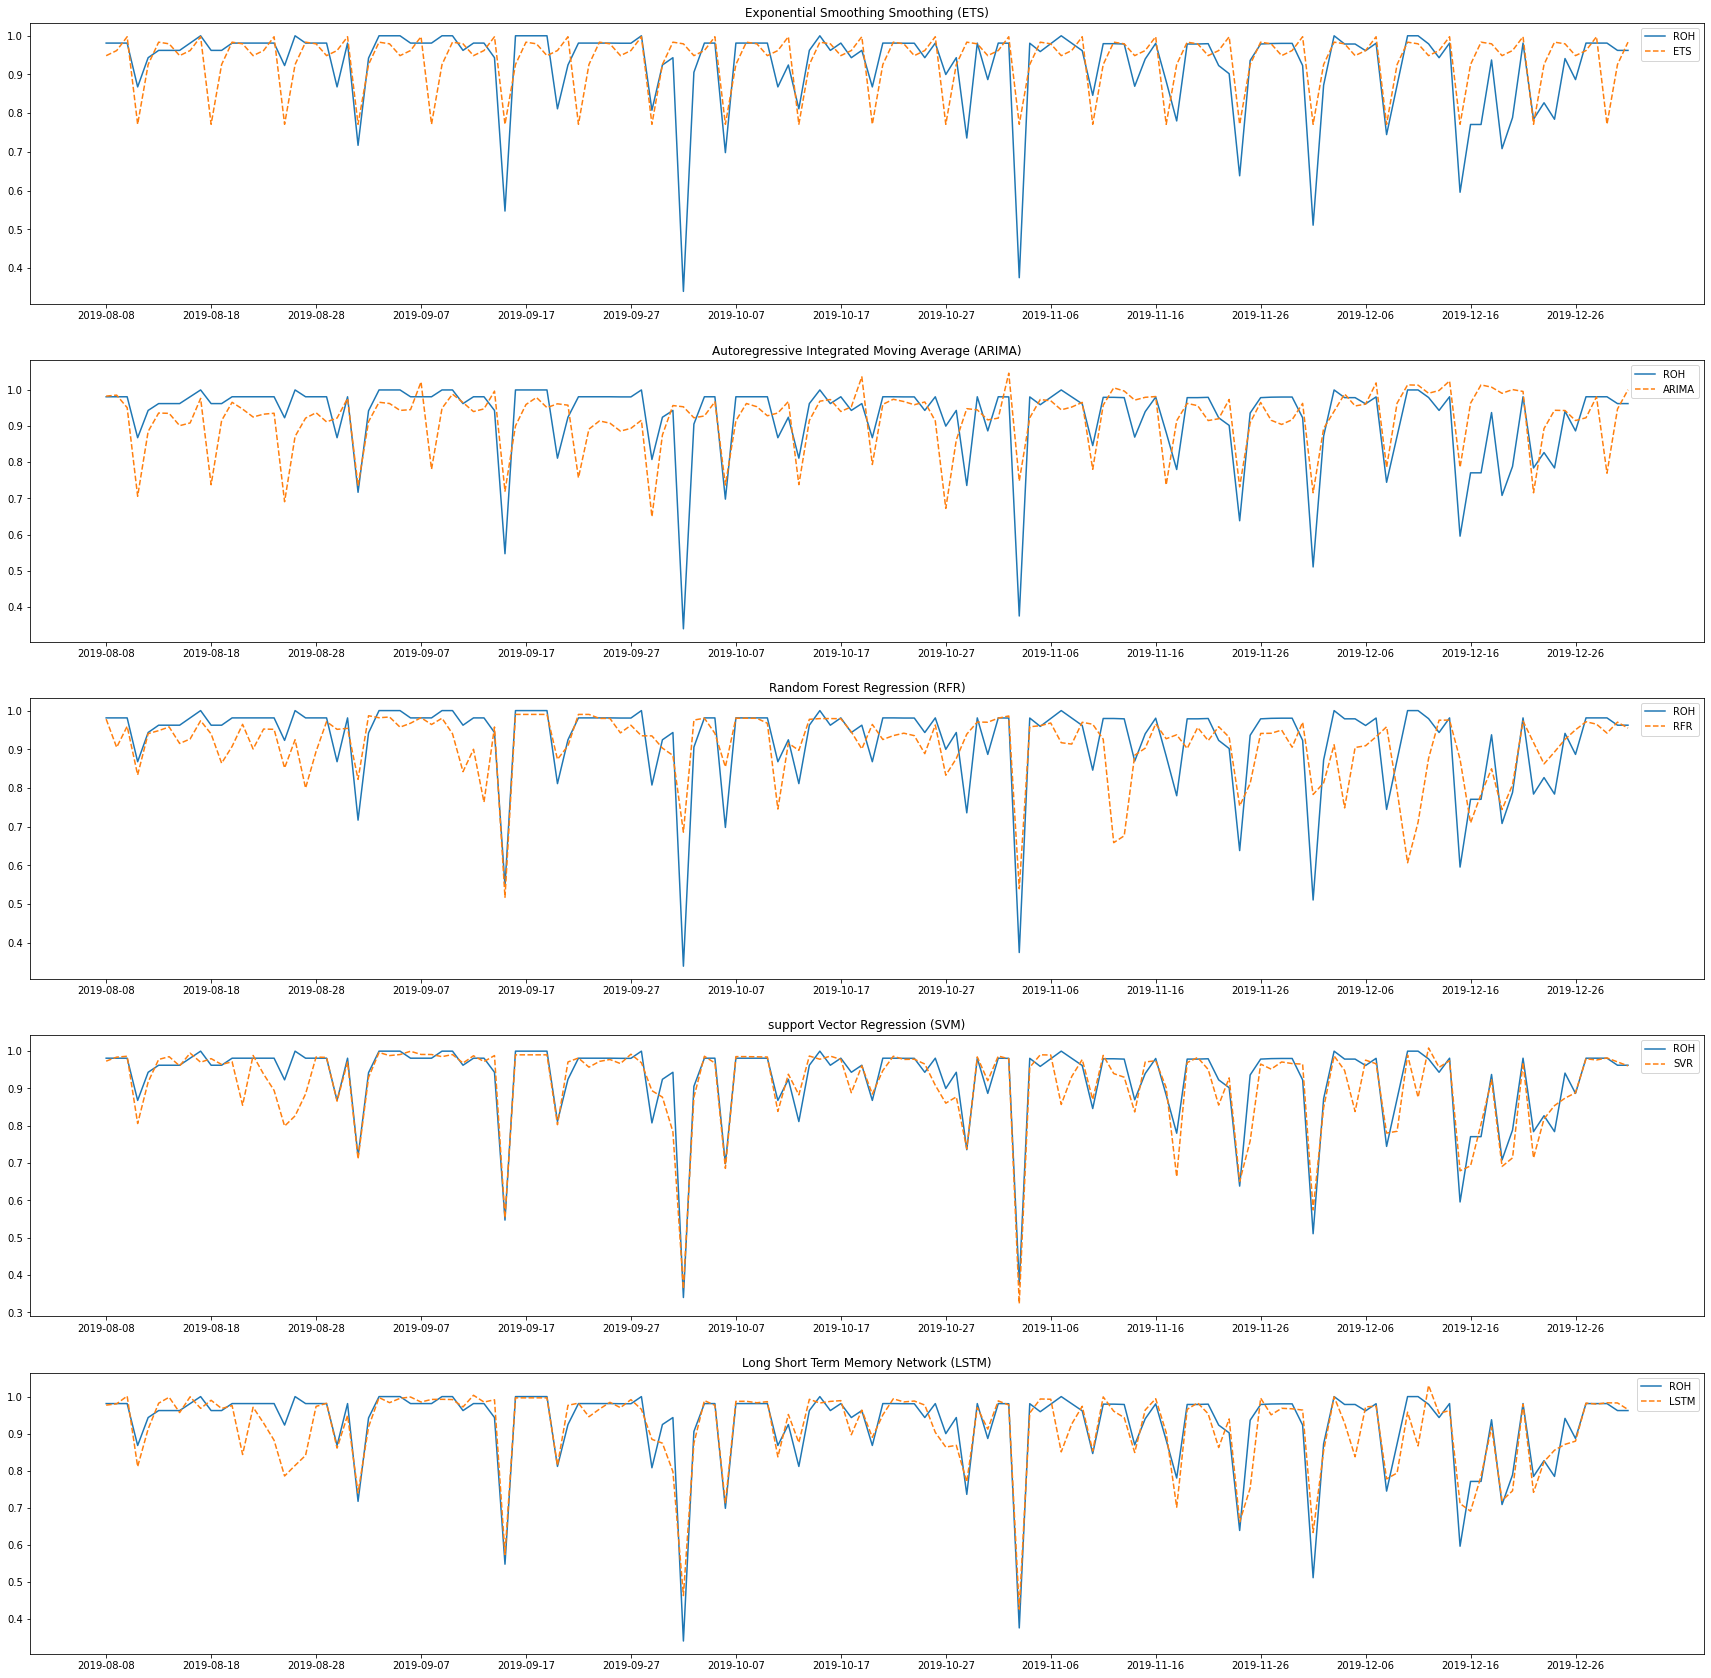

In [9]:
fig, ax = plt.subplots(nrows=5)
ax[0].plot(df['ROH'], label='ROH')
ax[0].plot(df.index,df['ETS'], linestyle='--',  label="ETS")
ax[0].legend(loc='best')
ax[0].set_title("Exponential Smoothing Smoothing (ETS)")
ax[0].set_xticks(np.arange(len(df.index),step=10))

ax[1].plot(df['ROH'], label='ROH')
ax[1].plot(df.index,df['ARIMA'], linestyle='--',  label="ARIMA")
ax[1].legend(loc='best')
ax[1].set_title("Autoregressive Integrated Moving Average (ARIMA)")
ax[1].set_xticks(np.arange(len(df.index),step=10))

ax[2].plot(df['ROH'], label='ROH')
ax[2].plot(df.index,df['RFR'], linestyle='--',  label="RFR")
ax[2].legend(loc='best')
ax[2].set_title("Random Forest Regression (RFR)")
ax[2].set_xticks(np.arange(len(df.index),step=10))

ax[3].plot(df['ROH'], label='ROH')
ax[3].plot(df.index,df['SVM'], linestyle='--',  label="SVR")
ax[3].legend(loc='best')
ax[3].set_title("support Vector Regression (SVM)")
ax[3].set_xticks(np.arange(len(df.index),step=10))

ax[4].plot(df['ROH'], label='ROH')
ax[4].plot(df.index,df['LSTM'], linestyle='--',  label="LSTM")
ax[4].legend(loc='best')
ax[4].set_title("Long Short Term Memory Network (LSTM)")
ax[4].set_xticks(np.arange(len(df.index),step=10))
# plt.xticks(np.arange(len(df.index),step=10))

# ax.legend(loc='best')
# ax.set_title("Exponential Smoothing Smoothing ")